# Use a tensorflow pretrained model

The example uses a pretrained Tensorflow model to perform
an imagenet classification task.

In [1]:
using Knet
using Images, Colors
using NNHelferlein
using Augmentor

### Get VGG net:

In [2]:
vgg = get_vgg16(trainable=true);

Using already downloaded weights for VGG16 (pretrained, TF/Keras)
Generating Conv layer from hdf with kernel (3, 3), 3 channels, 64 kernels.
Generating Conv layer from hdf with kernel (3, 3), 64 channels, 64 kernels.
Generating Conv layer from hdf with kernel (3, 3), 64 channels, 128 kernels.
Generating Conv layer from hdf with kernel (3, 3), 128 channels, 128 kernels.
Generating Conv layer from hdf with kernel (3, 3), 128 channels, 256 kernels.
Generating Conv layer from hdf with kernel (3, 3), 256 channels, 256 kernels.
Generating Conv layer from hdf with kernel (3, 3), 256 channels, 256 kernels.
Generating Conv layer from hdf with kernel (3, 3), 256 channels, 512 kernels.
Generating Conv layer from hdf with kernel (3, 3), 512 channels, 512 kernels.
Generating Conv layer from hdf with kernel (3, 3), 512 channels, 512 kernels.
Generating Conv layer from hdf with kernel (3, 3), 512 channels, 512 kernels.
Generating Conv layer from hdf with kernel (3, 3), 512 channels, 512 kernels.
Gene

# Predict images:

,,

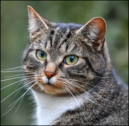
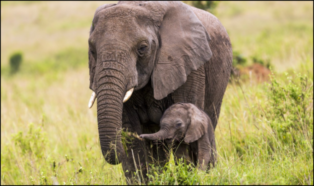
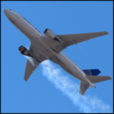

In [3]:
[load(joinpath(NNHelferlein.DATA_DIR, "elecat", "$name.jpg")) for name in 
            ("cat", "elephant", "plane")]

#### Image Preprocessing
Image preprocessing must be performed the same way as for the training data. 
Easiest way is to use the *Helferlein* function `preproc_imagenet_vgg` as
part of the augmentation pipeline:

In [4]:
img_path = joinpath(NNHelferlein.DATA_DIR, "elecat")

pipl = CropRatio(ratio=1.0) |> Resize(224,224)

imb = mk_image_minibatch(img_path, 2, train=false, shuffle=false,
        aug_pipl=pipl, pre_proc=preproc_imagenet_vgg)

ImageLoader("/home/andreas/Documents/Projekte/2022-NNHelferlein_KnetML/NNHelferlein/data/elecat", ["/home/andreas/Documents/Projekte/2022-NNHelferlein_KnetML/NNHelferlein/data/elecat/cat.jpg", "/home/andreas/Documents/Projekte/2022-NNHelferlein_KnetML/NNHelferlein/data/elecat/elephant.jpg", "/home/andreas/Documents/Projekte/2022-NNHelferlein_KnetML/NNHelferlein/data/elecat/plane.jpg"], [0, 0, 0], ["unknwon_class"], 2, false, [1, 2, 3], false, 2-step Augmentor.ImmutablePipeline:
 1.) Crop to 1:1 aspect ratio
 2.) Resize to 224×224, NNHelferlein.preproc_imagenet_vgg, false, nothing)

Use predict from NNHelferlein-Package:   
(ImageNet class-numbers differs by 1, because they are 0..999)

In [5]:
y = predict_imagenet(vgg, data=imb);

top-5 hits for sample 1: [282, 283, 286, 288, 623]
softmax       #   class label
   0.53     282   " 281: 'tabby, tabby cat'"
   0.43     283   " 282: 'tiger cat'"
   0.04     286   " 285: 'Egyptian cat'"
   0.00     288   " 287: 'lynx, catamount'"
   0.00     623   " 622: 'lens cap, lens cover'"
 
top-5 hits for sample 2: [387, 102, 386, 49, 364]
softmax       #   class label
   0.91     387   " 386: 'African elephant, Loxodonta africana'"
   0.08     102   " 101: 'tusker'"
   0.01     386   " 385: 'Indian elephant, Elephas maximus'"
   0.00      49   " 48: 'Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis'"
   0.00     364   " 363: 'armadillo'"
 
top-5 hits for sample 3: [405, 896, 909, 813, 745]
softmax       #   class label
   0.45     405   " 404: 'airliner'"
   0.28     896   " 895: 'warplane, military plane'"
   0.26     909   " 908: 'wing'"
   0.00     813   " 812: 'space shuttle'"
   0.00     745   " 744: 'projectile, missile'"
 
